In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
!pip install pmdarima==1.8.0

     |████████████████████████████████| 1.5MB 6.9MB/s 
     |████████████████████████████████| 9.5MB 29.4MB/s 
     |████████████████████████████████| 2.1MB 35.3MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Found existing installation: Cython 0.29.22
    Uninstalling Cython-0.29.22:
      Successfully uninstalled Cython-0.29.22


In [4]:
!pip install scikit-learn==0.24

     |████████████████████████████████| 22.3MB 48.0MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [5]:
filename = "/content/gdrive/My Drive/BITS/4-2/ASM_sop/Telangana1/dataset.csv"
# The data of all the files from year 2000-2014 of AP have been combined and put into one file called Dataset
df = pd.read_csv(filename)
df=df.iloc[:,:17]
df

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,DHI,DHI Perez,DNI,DNI Perez,Fill Flag,GHI,GHI Perez
0,2000,1,1,0,0,17,0,0,0,14,0,0,0,0,0,0,0
1,2000,1,1,1,0,17,0,0,0,15,0,0,0,0,0,0,0
2,2000,1,1,2,0,19,62,205,94,16,69,69,147,147,0,92,92
3,2000,1,1,3,0,23,131,463,297,17,131,138,463,460,0,297,303
4,2000,1,1,4,0,25,170,605,490,17,170,166,605,624,0,490,496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131395,2014,12,31,19,0,19,0,0,0,17,0,0,0,0,0,0,0
131396,2014,12,31,20,0,19,0,0,0,17,0,0,0,0,0,0,0
131397,2014,12,31,21,0,18,0,0,0,17,0,0,0,0,0,0,0
131398,2014,12,31,22,0,17,0,0,0,16,0,0,0,0,0,0,0


In [6]:
df['Date']=df['Year'].astype(str) + df['Month'].astype(str).str.zfill(2) + df['Day'].astype(str).str.zfill(2) + df['Hour'].astype(str).str.zfill(2)+df['Minute'].astype(str)

df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d%H%M')
df.head(24)

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,DHI,DHI Perez,DNI,DNI Perez,Fill Flag,GHI,GHI Perez,Date
0,2000,1,1,0,0,17,0,0,0,14,0,0,0,0,0,0,0,2000-01-01 00:00:00
1,2000,1,1,1,0,17,0,0,0,15,0,0,0,0,0,0,0,2000-01-01 01:00:00
2,2000,1,1,2,0,19,62,205,94,16,69,69,147,147,0,92,92,2000-01-01 02:00:00
3,2000,1,1,3,0,23,131,463,297,17,131,138,463,460,0,297,303,2000-01-01 03:00:00
4,2000,1,1,4,0,25,170,605,490,17,170,166,605,624,0,490,496,2000-01-01 04:00:00
5,2000,1,1,5,0,28,193,682,640,17,193,191,682,691,0,640,644,2000-01-01 05:00:00
6,2000,1,1,6,0,29,205,720,729,17,205,239,720,679,0,729,734,2000-01-01 06:00:00
7,2000,1,1,7,0,29,207,727,748,17,295,295,518,518,0,681,681,2000-01-01 07:00:00
8,2000,1,1,8,0,29,200,706,694,17,200,210,706,696,0,694,698,2000-01-01 08:00:00
9,2000,1,1,9,0,29,184,651,574,17,184,173,651,686,0,574,585,2000-01-01 09:00:00


In [7]:
X=df[['Date','GHI']]
X.set_index('Date',inplace=True)
X.head(24)

,GHI
Date,
2000-01-01 00:00:00,0
2000-01-01 01:00:00,0
2000-01-01 02:00:00,92
2000-01-01 03:00:00,297
2000-01-01 04:00:00,490
2000-01-01 05:00:00,640
2000-01-01 06:00:00,729
2000-01-01 07:00:00,681
2000-01-01 08:00:00,694


In [8]:
X=X.between_time('08:00','17:00',include_start=True,include_end=True)
X=X.reset_index()
X.head(24)

,Date,GHI
0,2000-01-01 08:00:00,694
1,2000-01-01 09:00:00,574
2,2000-01-01 10:00:00,400
3,2000-01-01 11:00:00,196
4,2000-01-01 12:00:00,3
5,2000-01-01 13:00:00,0
6,2000-01-01 14:00:00,0
7,2000-01-01 15:00:00,0
8,2000-01-01 16:00:00,0
9,2000-01-01 17:00:00,0


In [9]:
y=X.resample('D',on='Date').mean()
y

,GHI
Date,
2000-01-01,186.7
2000-01-02,187.8
2000-01-03,190.3
2000-01-04,192.8
2000-01-05,192.2
...,...
2014-12-27,184.9
2014-12-28,186.4
2014-12-29,185.7


In [10]:
X_train=y[:'2011']
X_test=y['2012':]

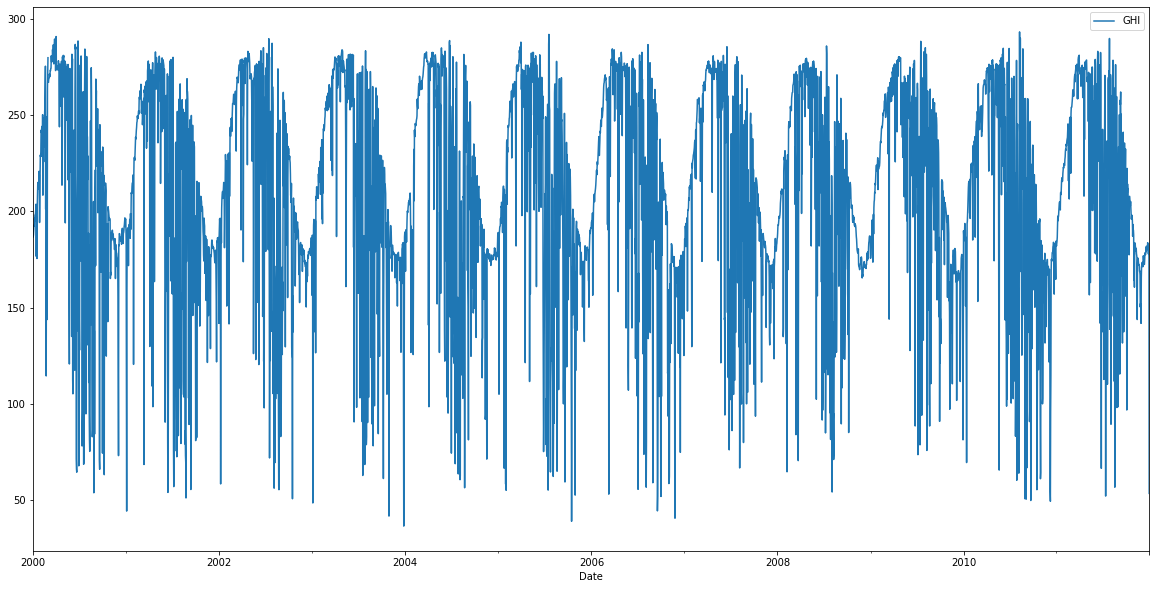

In [11]:
X_train.plot(figsize=(20,10))

In [12]:
TrainDF=pd.DataFrame(X_train)
TrainDF=TrainDF.reset_index()

In [13]:
TrainDF=TrainDF.dropna()
TrainDF=TrainDF.reset_index()

In [14]:
del TrainDF['index']
TrainDF

,Date,GHI
0,2000-01-01,186.7
1,2000-01-02,187.8
2,2000-01-03,190.3
3,2000-01-04,192.8
4,2000-01-05,192.2
...,...,...
4375,2011-12-27,179.4
4376,2011-12-28,177.8
4377,2011-12-29,180.3
4378,2011-12-30,176.4


In [15]:
TrainDF.plot(figsize=(20,10))

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f5b5c925d40> (for post_execute):


ValueError: ignored

ValueError: ignored

In [16]:
TrainDataFinal=[]
for i in range(5):
  newFoo=TrainDF[i::5]
  newFoo.set_index('Date',inplace=True)
  TrainDataFinal.append(newFoo)
TrainDataFinal

[              GHI
 Date             
 2000-01-01  186.7
 2000-01-06  196.3
 2000-01-11  200.6
 2000-01-16  175.5
 2000-01-21  212.2
 ...           ...
 2011-12-07  173.4
 2011-12-12  172.4
 2011-12-17  177.6
 2011-12-22  181.5
 2011-12-27  179.4
 
 [876 rows x 1 columns],               GHI
 Date             
 2000-01-02  187.8
 2000-01-07  194.9
 2000-01-12  203.7
 2000-01-17  202.6
 2000-01-22  211.5
 ...           ...
 2011-12-08  176.9
 2011-12-13  174.1
 2011-12-18  181.1
 2011-12-23  180.1
 2011-12-28  177.8
 
 [876 rows x 1 columns],               GHI
 Date             
 2000-01-03  190.3
 2000-01-08  198.1
 2000-01-13  176.6
 2000-01-18  207.8
 2000-01-23  217.0
 ...           ...
 2011-12-09  175.0
 2011-12-14  177.5
 2011-12-19  179.0
 2011-12-24  180.9
 2011-12-29  180.3
 
 [876 rows x 1 columns],               GHI
 Date             
 2000-01-04  192.8
 2000-01-09  198.2
 2000-01-14  192.1
 2000-01-19  215.0
 2000-01-24  220.8
 ...           ...
 2011-12-10  172.8
 2011-12-1

In [17]:
from pmdarima.arima import ARIMA

predictions=[]
for i in range(5):
  stepwise_model = ARIMA(order=(1,1,0),seasonal_order=(1,1,0,73))
  stepwise_model.fit(TrainDataFinal[i])
  print(stepwise_model.summary())
  pred=stepwise_model.predict(n_periods=219)
  predictions.append(pred)
predictions

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  876
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 73)   Log Likelihood               -4474.420
Date:                            Thu, 29 Apr 2021   AIC                           8956.840
Time:                                    20:36:42   BIC                           8975.588
Sample:                                         0   HQIC                          8964.041
                                            - 876                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0774      2.338      0.033      0.974      -4.505       4.660
ar.L1         -0.4396      0.026   

[array([191.36550969, 199.61558192, 185.42794602, 202.1018209 ,
        220.01160585, 222.70732984, 228.9977342 , 232.87506787,
        238.49824146, 246.75503618, 231.42648756, 254.18122059,
        254.31393036, 261.838251  , 266.31342034, 266.70480038,
        276.03856781, 277.74088908, 278.3356782 , 278.11440644,
        281.19467921, 275.92331536, 260.9319397 , 281.66267428,
        223.13312274, 267.11173214, 279.32023126, 246.82966033,
        168.52406707, 256.91244099, 233.05695203, 237.78614266,
        233.96363731, 200.35675045, 165.68681141, 176.11254451,
        180.39738343, 159.26783784, 268.30845619, 141.638696  ,
        184.28833967, 164.65415028, 204.29785656, 199.30747043,
        241.51813943, 254.83917507, 212.95447002, 181.74888866,
        160.90926856, 182.16631612, 174.62860959, 162.17009827,
        166.12689546, 201.97721871, 199.34871635, 188.21274453,
        186.1152526 , 204.36328674, 162.0253954 , 193.59294668,
        202.23609856, 180.50815655, 145.

In [18]:
results=[]
for j in range(len(predictions[0])):
  for i in range(5):
    results.append(predictions[i][j])
results

[191.3655096947504,
 193.73186614326508,
 206.02304949900616,
 209.8480761136591,
 137.6712113546279,
 199.61558192199843,
 199.63767320818388,
 220.35568918296676,
 208.63278949290083,
 112.6916558641927,
 185.42794601578598,
 162.22043110779595,
 158.71694428437132,
 193.2512275795034,
 131.21334088825003,
 202.1018209044556,
 210.42342381970627,
 231.38995115367467,
 241.43530464146286,
 138.9638414374742,
 220.01160585493398,
 222.77888431122346,
 240.98753102894477,
 246.15741210787448,
 136.08044301119398,
 222.7073298372329,
 215.01821317498798,
 241.98488154995593,
 251.85031907512976,
 151.69929325528676,
 228.9977341979287,
 229.56389245114784,
 246.85437267320748,
 256.00789303493156,
 153.57462881880696,
 232.87506787321206,
 214.14944604565784,
 252.4159132587956,
 266.59437514739466,
 157.66408650543428,
 238.49824146234306,
 243.82910157937158,
 261.86292797440376,
 269.2700411084116,
 166.02765071515938,
 246.75503617822318,
 218.0668910106598,
 249.27560168954093,
 268

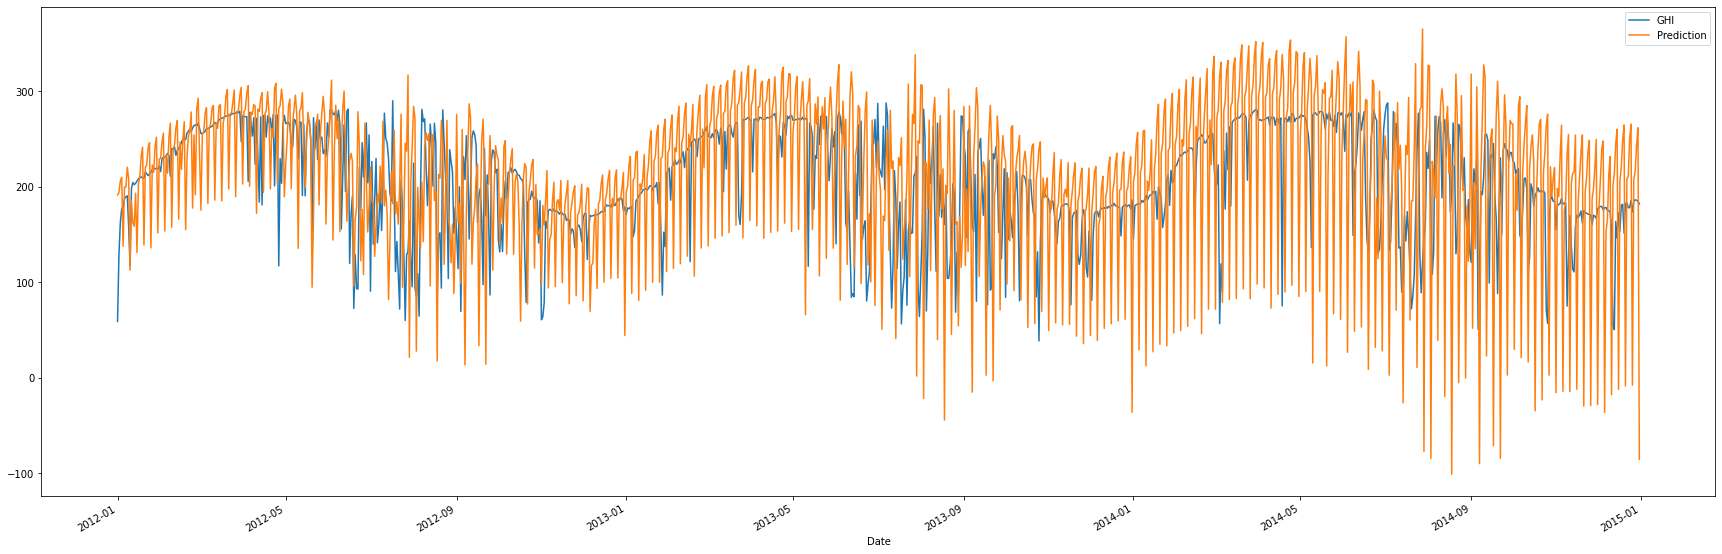

In [19]:
X_test=X_test.dropna()
Finalresults = pd.DataFrame(results,index = X_test[:1095].index,columns=['Prediction'])
pd.concat([X_test[:1095],Finalresults],axis=1).plot(figsize=(30,10))

In [ ]:
len(results)

1095

In [ ]:
Finalresults

,Prediction
Date,
2012-01-01,561.833762
2012-01-02,563.852391
2012-01-03,560.782831
2012-01-04,353.498675
2012-01-05,412.288085
...,...
2014-12-27,599.700574
2014-12-28,649.486240
2014-12-29,664.690736


In [20]:
from sklearn.metrics import mean_squared_error
mean_squared_error(X_test[:1095],Finalresults ,squared=False)

90.4901691568448

In [21]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(X_test,Finalresults)

0.41655028416882617

In [ ]:
Finalresults.to_csv('/content/gdrive/My Drive/BITS/4-2/ASM_sop/Code/Gujarat1/SARIMAdaily.csv')